<a href="https://colab.research.google.com/github/IhorViskrivets/python_projects/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery


In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
auth.authenticate_user()


In [ ]:
client = bigquery.Client(project="data-analytics-mate")


In [ ]:
# SQL-запит
query = """
SELECT
s.date,
s.ga_session_id AS session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.medium AS traffic_source,
sp.channel,
a.id AS account_id,
a.is_verified,
a.is_unsubscribed,
p.category,
p.name,
p.price,
p.short_description
FROM `DA.session` s
LEFT JOIN `DA.order` o ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` a ON acs.account_id = a.id
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
"""

query_job = client.query(query)  # виконання SQL-запиту
results = query_job.result()
df = results.to_dataframe() # перетворення результатів на датафрейм
df.head()

,date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [ ]:
# перетворення колонки з датою на адекватний формат
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               349545 non-null  datetime64[ns]
 1   session_id         349545 non-null  Int64         
 2   continent          349545 non-null  object        
 3   country            349545 non-null  object        
 4   device             349545 non-null  object        
 5   browser            349545 non-null  object        
 6   mobile_model_name  349545 non-null  object        
 7   operating_system   349545 non-null  object        
 8   language           235279 non-null  object        
 9   traffic_source     349545 non-null  object        
 10  channel            349545 non-null  object        
 11  account_id         27945 non-null   Int64         
 12  is_verified        27945 non-null   Int64         
 13  is_unsubscribed    27945 non-null   Int64   

In [ ]:
df.describe()

,date,session_id,account_id,is_verified,is_unsubscribed,price
count,349545,349545.0,27945.0,27945.0,27945.0,33538.000000
mean,2020-12-16 12:42:00.602497536,4992250296.631739,659005.065557,0.71698,0.16944,953.298679
min,2020-11-01 00:00:00,1205.0,636133.0,0.0,0.0,3.000000
25%,2020-11-26 00:00:00,2493646855.0,647576.0,0.0,0.0,170.000000
50%,2020-12-15 00:00:00,4988476074.0,658952.0,1.0,0.0,445.000000
75%,2021-01-08 00:00:00,7491286508.0,670414.0,1.0,0.0,1195.000000
max,2021-01-31 00:00:00,9999997129.0,681962.0,1.0,1.0,9585.000000
std,NaN,2887450949.537772,13216.529465,0.450474,0.375147,1317.001775


### Опис колонок

date - дата замовлення

session_id - ідентифікатор сесії

continent - континент користувача

country - країна користувача

device - пристрій користувача (desktop, modile, tablet)

browser - браузер користувача

mobile_model_name - назва пристрою

operating_system - операційна система

language - мова

traffic_source - джерело трафіку

channel - канал трафіку

account_id - ідентифікатор акаунта

is_verified - чи підтвердив користувач імейл (1 - так, 0 - ні)

is_unsubscribed - чи відписався користувач від розсилки (1 - так, 0 - ні)

category - категорія товару

name - назва товару

price - ціна товару

short_description - короткий опис товару

### Опис датасету

загальна кількість колонок - 18

кількість колонок числового типу - 5: session_id, account_id, is_verified, is_unsubscribed, price

кількість колонок категоріального типу - 12: continent, country, device, browser, mobile_model_name, operating system, language, traffic_source, channel, category, name, short_description

кількість колонок типу datetime - 1 - date

кількість унікальних сесій - 349545

період часу - 01.11.2020 - 31.01.2021 (3 місяці)


### Робота із пропущеними значеннями

In [ ]:
print(f"Кількість пропущених значень:\n{df.isna().sum()}")
print(f"\nВідсоток пропущених значень:\n{df.isna().sum() / df.shape[0] * 100}")

Кількість пропущених значень:
date                      0
session_id                0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language                  0
traffic_source            0
channel                   0
account_id           321600
is_verified          321600
is_unsubscribed      321600
category             316007
name                 316007
price                316007
short_description    316007
day                       0
dtype: int64

Відсоток пропущених значень:
date                  0.000000
session_id            0.000000
continent             0.000000
country               0.000000
device                0.000000
browser               0.000000
mobile_model_name     0.000000
operating_system      0.000000
language              0.000000
traffic_source        0.000000
channel               0.000000
account_id           92.005321
is_verified          92

In [ ]:
df["language"] = df["language"].fillna("unknown") # заміняємо пропущені мови на unknown
print(f"Кількість пропущених значень:\n{df.isna().sum()}") # перевіряємо

Кількість пропущених значень:
date                      0
session_id                0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language                  0
traffic_source            0
channel                   0
account_id           321600
is_verified          321600
is_unsubscribed      321600
category             316007
name                 316007
price                316007
short_description    316007
dtype: int64


In [ ]:
# перевіряємо на наявність дублікатів
print(df.duplicated().sum())

0


В ході перевірки датасету на наявність пропущених значень було замінено пропуски в колонці language на unknown

Кількість пропусків у інших колонках натякає не те, що вони було утворені внаслідок з'єднання таблиць (LEFT JOIN). Тому ми їх проігноруємо.

Дублікати в датасеті відсутні.

### Загальний аналіз даних

In [ ]:
print(f"Топ 3 континенти за продажами:\n{df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3)}")
print(f"\nТоп 3 континенти за кількістю замовлень:\n{df.groupby('continent')['price'].count().sort_values(ascending=False).head(3)}")

Топ 3 континенти за продажами:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Топ 3 континенти за кількістю замовлень:
continent
Americas    18553
Asia         7950
Europe       6261
Name: price, dtype: int64


In [ ]:
print(f"Топ 5 країн за продажами:\n{df.groupby('country')['price'].sum().sort_values(ascending=False).head(5)}")
print(f"\nТоп 5 країн за кількістю замовлень:\n{df.groupby('country')['price'].count().sort_values(ascending=False).head(5)}")

Топ 5 країн за продажами:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Топ 5 країн за кількістю замовлень:
country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Name: price, dtype: int64


In [ ]:
print(f"Топ 10 категорій товарів за загальною сумою продажів:\n{df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)}")

Топ 10 категорій товарів за загальною сумою продажів:
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


In [ ]:
print(f"Топ 10 категорій товарів за загальною сумою продажів у США:\n{df[df['country'] == 'United States'].groupby('category')['price'].sum().sort_values(ascending=False).head(10)}")

Топ 10 категорій товарів за загальною сумою продажів у США:
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


Розрахунки показали, що лідери за загальними продажами серед континентив і країн збігаються із лідерами за кількістю замовлень.

Топ 3 континенти за продажами і замовленнями:
1. Америка
2. Азія
3. Європа

Топ 5 країн за продажами і замовленнями:
1. Сполучені Штати
2. Індія
3. Канада
4. Велика Британія
5. Франція

Топ 10 категорій товарів за загальною сумою продажів:
1. Sofas & armchairs
2. Chairs
3. Beds
4. Bookcases & shelving units
5. Cabinets & cupboards
6. Outdoor furniture
7. Tables & desks
8. Chests of drawers & drawer units
9. Bar furniture
10. Children's furniture

Топ 10 категорій товарів за загальною сумою продажів у Сполучених Штатах:

1. Sofas & armchairs
2. Chairs
3. Beds
4. Bookcases & shelving units
5. Cabinets & cupboards
6. Outdoor furniture
7. Tables & desks
8. Chests of drawers & drawer units
9. Bar furniture
10. Children's furniture

Бачимо, що топ категорій за продажами у тоталі та у США (країна з найбільшими продажами) повністю збігаються.

In [ ]:
total_sales = df["price"].sum() # рахуємо загальну суму продажів
print(f"Продажі у розрізі типів пристроїв (% від загального):\n{df.groupby('device')['price'].sum() / total_sales * 100}")
print(f"\nПродажі у розрізі моделей пристроїв (% від загального):\n{(df.groupby('mobile_model_name')['price'].sum() / total_sales * 100).sort_values(ascending=False)}")

Продажі у розрізі типів пристроїв (% від загального):
device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64

Продажі у розрізі моделей пристроїв (% від загального):
mobile_model_name
Chrome        27.835602
<Other>       20.440966
Safari        20.302504
iPhone        20.082667
ChromeBook     5.725241
Edge           2.180746
iPad           1.403910
Firefox        1.316998
Pixel 4 XL     0.369976
Pixel 3        0.341390
Name: price, dtype: float64


In [ ]:
print(f"Продажі за джерелами трафіку (% від загального):\n{(df.groupby('traffic_source')['price'].sum() / total_sales * 100).sort_values(ascending=False)}")

Продажі за джерелами трафіку (% від загального):
traffic_source
organic           34.202840
(none)            23.442345
referral          17.646386
<Other>           14.047882
(data deleted)     6.386645
cpc                4.273902
Name: price, dtype: float64


In [ ]:
print(f"Відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу: {round((df[df['is_verified'] == 1]['account_id'].nunique() / df['account_id'].nunique() * 100), 2)}%")
print(f"Відсоток зареєстрованих користувачів, які відписалися від розсилки: {round((df[df['is_unsubscribed'] == 1]['account_id'].nunique() / df['account_id'].nunique() * 100), 2)}%")

Відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу: 71.7%
Відсоток зареєстрованих користувачів, які відписалися від розсилки: 16.94%


In [ ]:
verified_sales = df[df['is_verified'] == 1]
print(f"Загальні продажі для користувачів, які підтвердили свою електронну адресу: {df[df['is_verified'] == 1]["price"].sum()}")
print(f"Загальні продажі для користувачів, які НЕ підтвердили свою електронну адресу: {df[df['is_verified'] == 0]["price"].sum()}")
print(f"Загальні продажі для користувачів, які відписалися від розсилки: {df[df['is_unsubscribed'] == 1]["price"].sum()}")
print(f"Загальні продажі для користувачів, які  НЕ відписалися від розсилки: {df[df['is_unsubscribed'] == 0]["price"].sum()}")

Загальні продажі для користувачів, які підтвердили свою електронну адресу: 1866017.4
Загальні продажі для користувачів, які НЕ підтвердили свою електронну адресу: 716501.1000000001
Загальні продажі для користувачів, які відписалися від розсилки: 431721.6
Загальні продажі для користувачів, які  НЕ відписалися від розсилки: 2150796.9


Text(0, 0.5, 'Total sales')

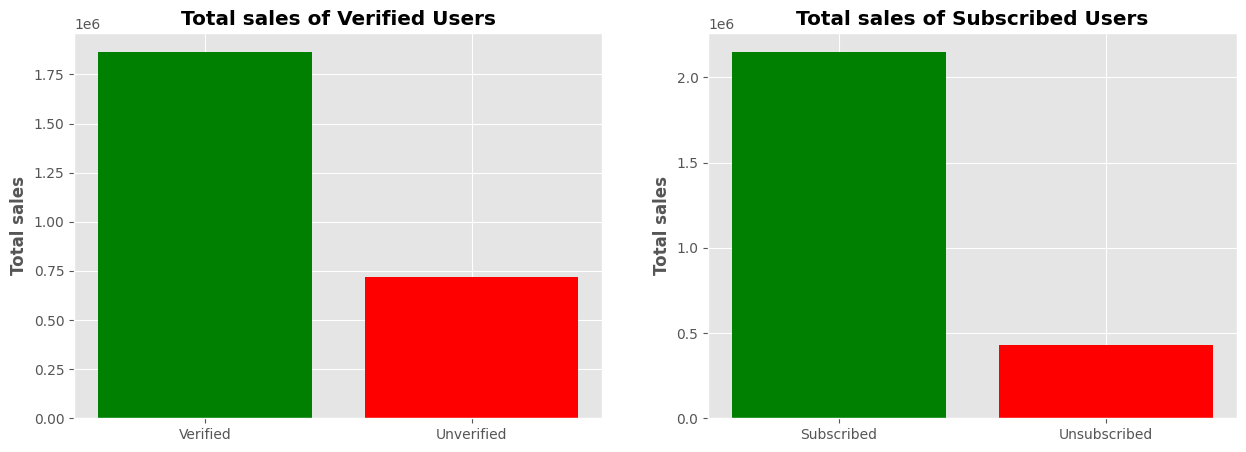

In [ ]:
# будуємо графіки для is_verified та is_insubscribed
plt.style.use("ggplot") # стиль графіків
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # створюємо фігуру

# продажі верифікованих
verified_sum = df[df["is_verified"] == 1]["price"].sum()
unverified_sum = df[df["is_verified"] == 0]["price"].sum()
categories_verified = ["Verified", "Unverified"]
values_verified = [verified_sum, unverified_sum]
ax[0].bar(categories_verified, values_verified, color=["green", "red"])
ax[0].set_title("Total sales of Verified Users", fontweight="bold")
ax[0].set_ylabel("Total sales", fontweight="bold")

# продажі підписаних на розсилку
unsubscribed_sum = df[df["is_unsubscribed"] == 1]["price"].sum()
subscribed_sum = df[df["is_unsubscribed"] == 0]["price"].sum()
categories_subscribed = ["Subscribed", "Unsubscribed"]
values_subscribed = [subscribed_sum, unsubscribed_sum]
ax[1].bar(categories_subscribed, values_subscribed, color=["green", "red"])
ax[1].set_title("Total sales of Subscribed Users", fontweight="bold")
ax[1].set_ylabel("Total sales", fontweight="bold")

In [ ]:
print(f"Топ 5 країн за кількістю зареєстрованих користувачів:\n{df.groupby('country')['account_id'].count().sort_values(ascending=False).head(5)}")

Топ 5 країн за кількістю зареєстрованих користувачів:
country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Name: account_id, dtype: Int64


Найбільше продажів було зроблено через десктопи (59%) та через ідентифікатор моделі пристрою "chrome" (28%).

Органічне джерело трафіку згенерувало найбільшу кількість продажів (34%).

71.7% зареєстрованих користувачів підтвердили свою електронну адресу.

16.94% зареєстрованих користувачів відписалися від розсилки.

На графіках бачимо, що користувачі, які верифікували свій email, зробили більше покупок ніж ті, хто не верифікував. А також загальна сума покупок користувачів, які залишилися підписані на розсилку, значно переважає покупки тих, хто відписався.

Топ 5 країн за кількістю зареєстрованих користувачів повністю збігається із топом за загальними продажами і кількістю замовлень

Топ 5 країн за кількістю зареєстрованих споживачів:
1. Сполучені Штати
2. Індія
3. Канада
4. Велика Британія
5. Франція

### Аналіз динаміки продажів

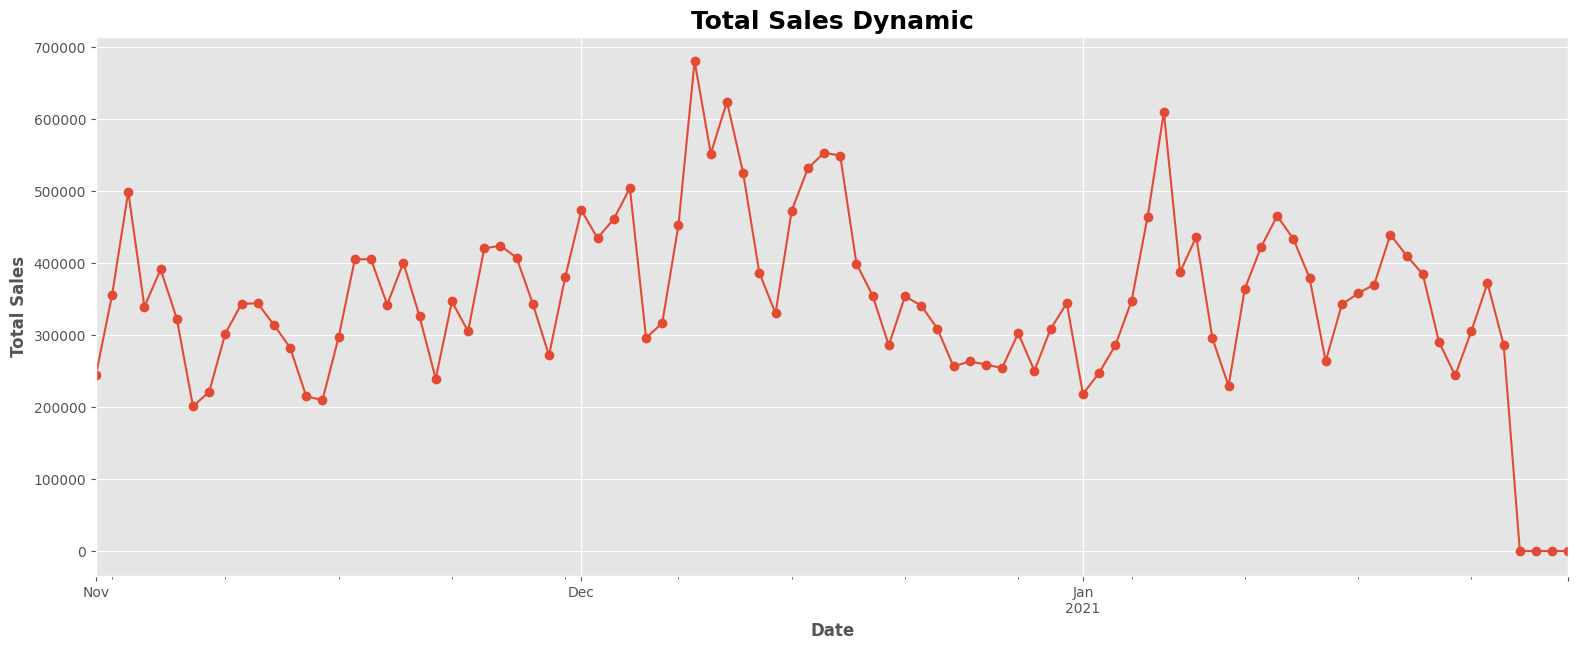

In [ ]:
# будуємо графік загальних продажів
plt.figure(figsize=(19, 7))
df.groupby("date")["price"].sum().plot(kind="line", marker="o")
plt.title("Total Sales Dynamic", fontsize=18, fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Total Sales", fontweight="bold")
plt.show()

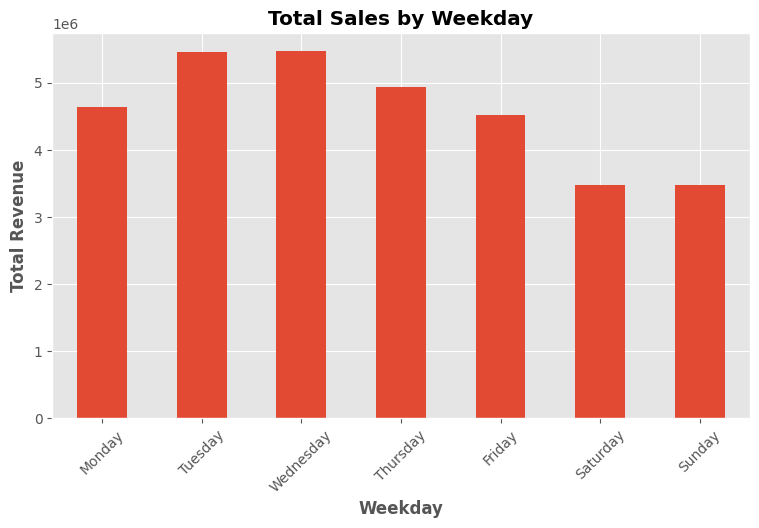

In [ ]:
# для аналізу продажів за днями тижня створимо колонку з назвою дня, коли було зроблено замовлення
df["day"] = df["date"].dt.day_name()

# робимо правильний порядок днів тижня (без цього вони будуть в алфавітному порядку)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["day"] = pd.Categorical(df["day"], categories=days_order, ordered=True)

# будуємо графік загальних продажів за днями тижня
plt.figure(figsize=(9, 5))
df.groupby("day", observed=True)["price"].sum().plot(kind="bar")
plt.title("Total Sales by Weekday", fontweight="bold")
plt.xlabel("Weekday", fontweight="bold")
plt.ylabel("Total Revenue", fontweight="bold")
plt.xticks(rotation=45)
plt.show()

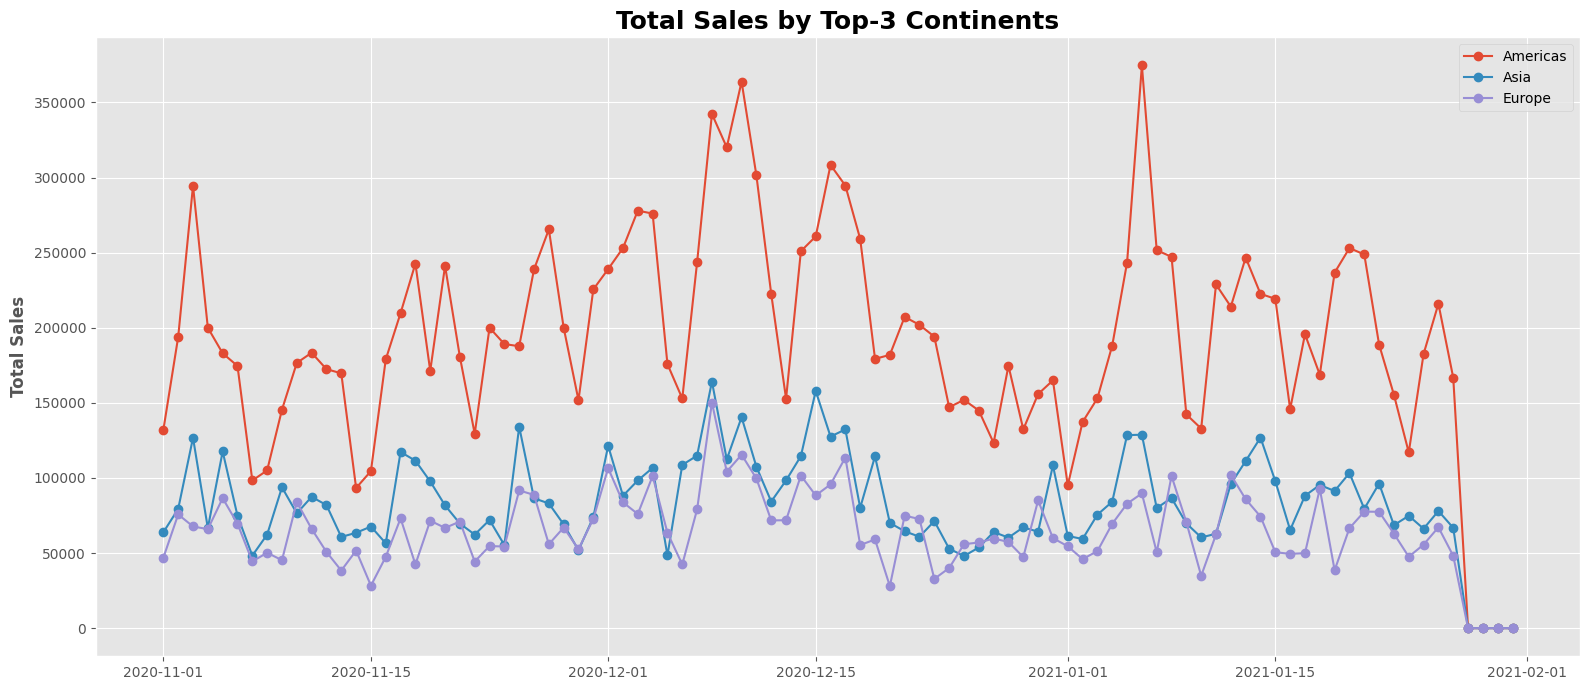

In [ ]:
# готуємо дані для візуалізації: фільтруємо, групуємо
americas = df[df["continent"] == "Americas"].groupby("date")["price"].sum()
asia = df[df["continent"] == "Asia"].groupby("date")["price"].sum()
europe = df[df["continent"] == "Europe"].groupby("date")["price"].sum()

# будуємо графік продажів за топ 3 континентами
plt.figure(figsize=(16, 7))
plt.plot(americas.index, americas.values, label="Americas", marker="o")
plt.plot(asia.index, asia.values, label="Asia", marker="o")
plt.plot(europe.index, europe.values, label="Europe", marker="o")
plt.title("Total Sales by Top-3 Continents", fontsize=18, fontweight="bold")
plt.ylabel("Total Sales", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

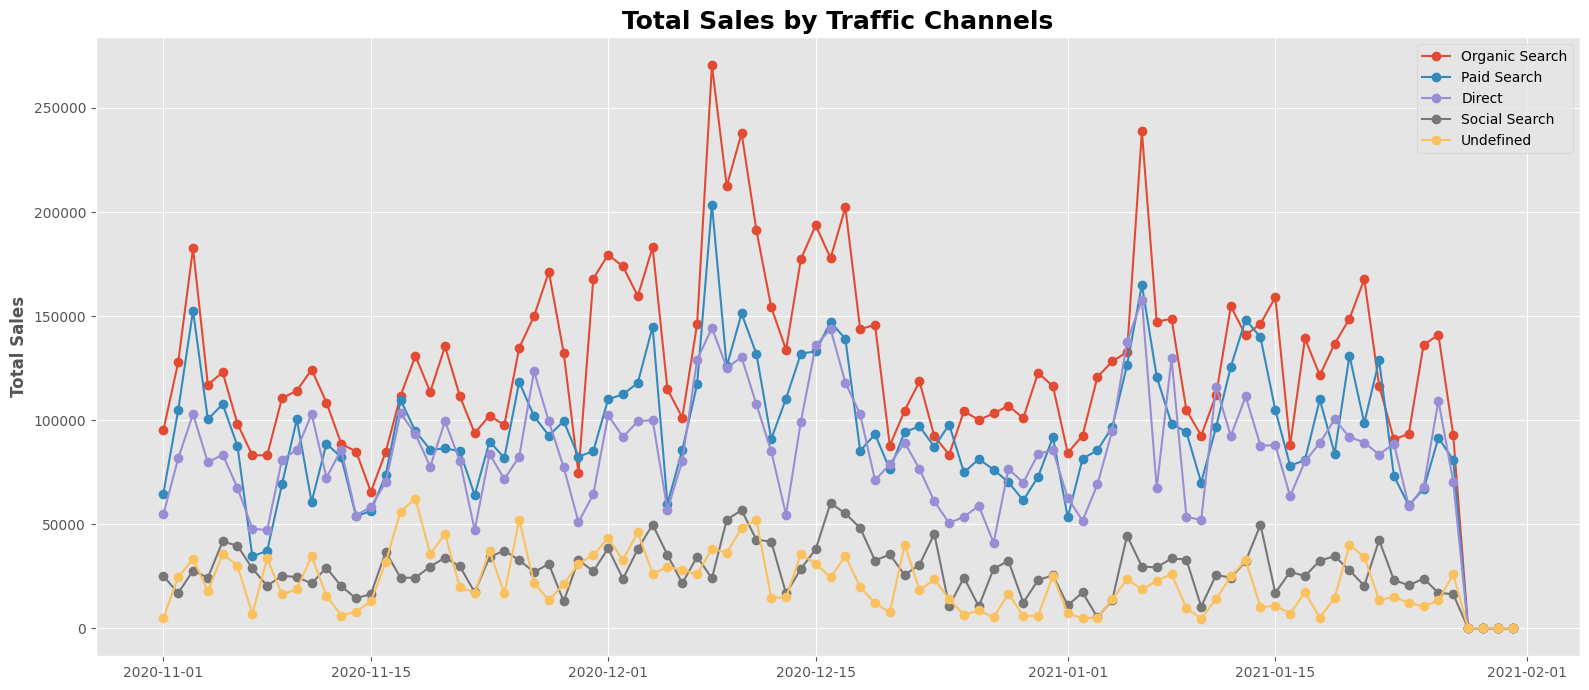

In [ ]:
# готуємо дані для візуалізації: фільтруємо, групуємо
organic = df[df["channel"] == "Organic Search"].groupby("date")["price"].sum()
paid = df[df["channel"] == "Paid Search"].groupby("date")["price"].sum()
direct = df[df["channel"] == "Direct"].groupby("date")["price"].sum()
social = df[df["channel"] == "Social Search"].groupby("date")["price"].sum()
undefined = df[df["channel"] == "Undefined"].groupby("date")["price"].sum()

# будуємо графік продажів за каналами трафіка
plt.figure(figsize=(16, 7))
plt.plot(organic.index, organic.values, label="Organic Search", marker="o")
plt.plot(paid.index, paid.values, label="Paid Search", marker="o")
plt.plot(direct.index, direct.values, label="Direct", marker="o")
plt.plot(social.index, social.values, label="Social Search", marker="o")
plt.plot(undefined.index, undefined.values, label="Undefined", marker="o")
plt.title("Total Sales by Traffic Channels", fontsize=18, fontweight="bold")
plt.ylabel("Total Sales", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

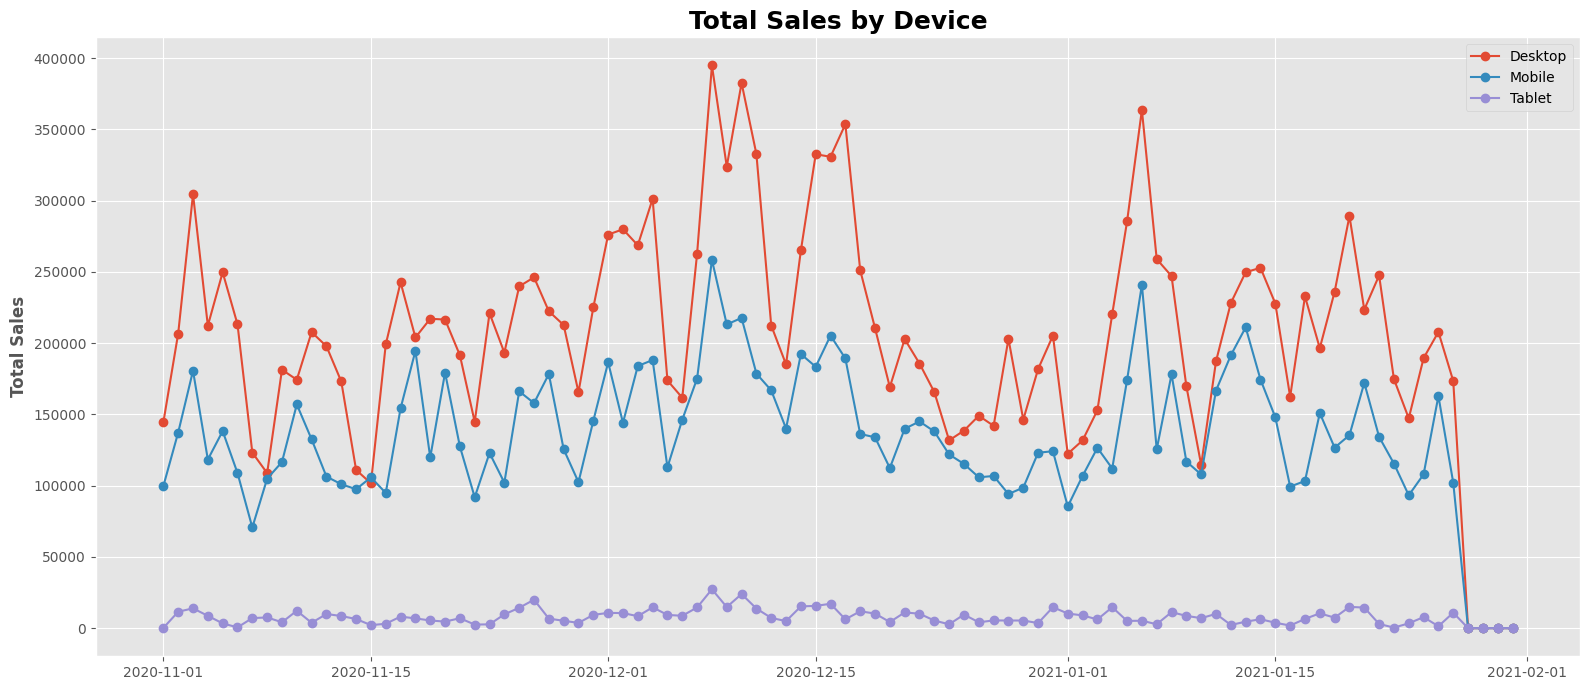

In [ ]:
# готуємо дані для візуалізації: фільтруємо, групуємо
desktop = df[df["device"] == "desktop"].groupby("date")["price"].sum()
mobile = df[df["device"] == "mobile"].groupby("date")["price"].sum()
tablet = df[df["device"] == "tablet"].groupby("date")["price"].sum()

# будуємо графік продажів за пристроями
plt.figure(figsize=(16, 7))
plt.plot(desktop.index, desktop.values, label="Desktop", marker="o")
plt.plot(mobile.index, mobile.values, label="Mobile", marker="o")
plt.plot(tablet.index, tablet.values, label="Tablet", marker="o")
plt.title("Total Sales by Device", fontsize=18, fontweight="bold")
plt.ylabel("Total Sales", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

На графіках можемо ознайомитися з динамікою продажів. Було візуалізовано загальний дохід, динаміку на топ 3 континендах, а також у розрізі каналів трафіку та пристроїв.

Бачимо яскраво виражену тижневу сезонність. Четвер і середа показали найвищі продажі, субота та неділя - найнижчі.

Пікові значення в райноі 1 листопада, середини грудня та початку січня можемо пов'язати відповідно із чорною п'ятницею, різдвяним шопінгом та відкриттям магазинів після новорічних святкувань. Спад продажів у другій половині грудня очевидно пов'язаний із різдвяними канікулами.

Серед каналів трафіку відзначимо органічний пошук, який згенерував найбільше доходу

Десктопи і мобільні продемонстрували схожу динаміку. Проте десктопи мають яскравіше виражені піки, і загалом вищі продажі.

### Зведені таблиці

In [ ]:
# будуємо зведену таблицю кількості сесій у розрізі каналів трафіку та типів девайсів
pd.pivot_table(df, values="session_id", index="channel", columns="device", aggfunc="count")

device,desktop,mobile,tablet
channel,,,
Direct,47825,31745,1812
Organic Search,72622,49014,2789
Paid Search,55167,37034,2140
Social Search,16288,10988,638
Undefined,12527,8486,470


In [ ]:
# топ 5 країн за загальними продажами
top_countries = df.groupby("country")["price"].sum().nlargest(5).index

# топ 10 категорій за загальними продажами
top_categories = df.groupby("category")["price"].sum().nlargest(10).index

# фільтруємо дані тільки для топ країн і категорій
filtered = df[(df["country"].isin(top_countries)) & (df["category"].isin(top_categories))]

# будуємо зведену таблицю продажів топ 10 категорій у топ 5 країнах
pd.pivot_table(filtered, values="price", index='category', columns="country", aggfunc="sum")

country,Canada,France,India,United Kingdom,United States
category,,,,,
Bar furniture,51724.0,11199.0,57657.0,22103.0,330805.0
Beds,354772.0,116414.0,358319.5,133816.0,2213058.0
Bookcases & shelving units,278981.9,73830.0,364507.4,113987.6,1567606.9
Cabinets & cupboards,181802.0,59101.5,191888.0,71684.5,994545.5
Chairs,417740.8,134029.4,544309.2,188519.4,2619773.8
Chests of drawers & drawer units,71952.0,21544.5,73111.0,36784.0,382388.0
Children's furniture,30264.0,14258.0,39177.0,13348.0,207575.0
Outdoor furniture,185322.8,40486.4,162289.4,57002.4,929245.2
Sofas & armchairs,692427.5,187735.0,788430.0,234812.0,3707144.5


In [ ]:
# вибираємо континенти
continents = df.groupby("continent")["price"].sum().nlargest(5).index

# фільтруємо дані
filtered_continent = df[(df["category"].isin(top_categories)) & (df["continent"].isin(continents))]

# будуємо зведену таблицю продажів топ 10 категорій по континентах
pd.pivot_table(filtered_continent, values="price", index='category', columns="continent", aggfunc="sum")

continent,Africa,Americas,Asia,Europe,Oceania
category,,,,,
Bar furniture,10724.0,406198.0,176684.0,131110.0,10787.0
Beds,57567.5,2773094.0,1077325.5,925047.5,77125.5
Bookcases & shelving units,32996.7,1968919.3,945368.9,650889.5,40046.7
Cabinets & cupboards,21106.0,1275562.5,545369.5,468652.5,20682.0
Chairs,44877.0,3309203.0,1524600.8,1178581.0,73356.0
Chests of drawers & drawer units,10941.0,484290.0,210383.5,186793.0,12145.0
Children's furniture,3962.0,253435.0,112389.0,93479.0,4314.0
Outdoor furniture,16343.8,1213115.2,488607.6,399553.2,21471.0
Sofas & armchairs,108120.0,4737307.0,1950022.0,1491224.5,78236.0


### Статистичний аналіз відмінностей між групами.

1. Проведемо аналіз продажів за кожну дату зареєстрованих та незареєстрованих користувачів

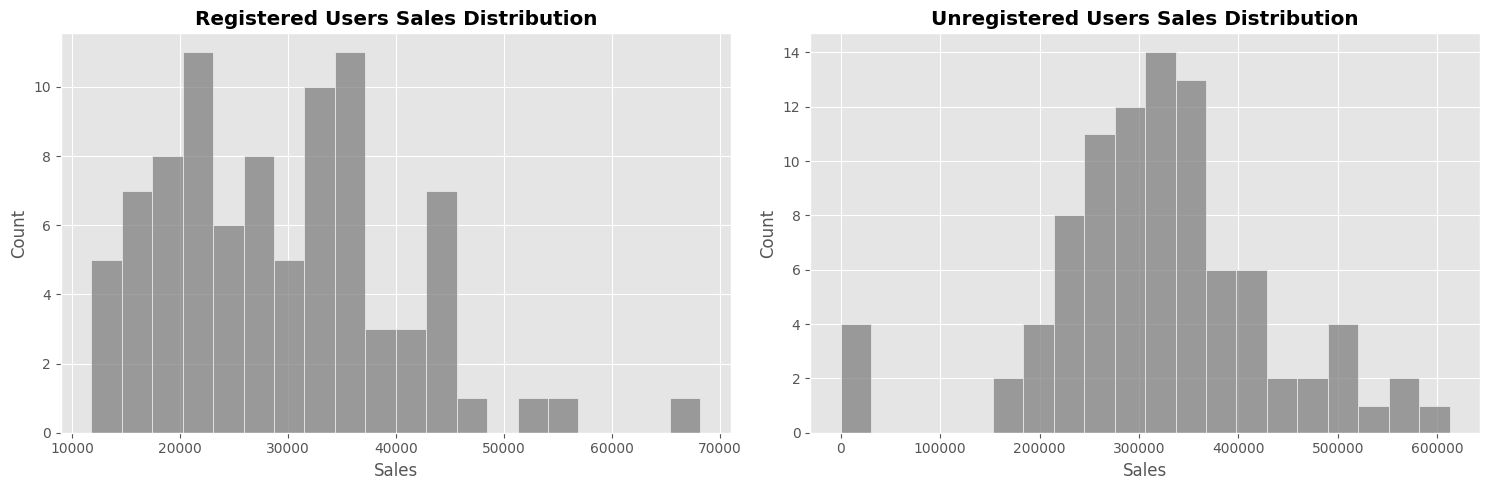

In [ ]:
registered = df[df["account_id"].notna()] # фільтруємо тільки зареєстрованих користувачів
registered_sales = registered.groupby("date")["price"].sum().dropna() # середнє покупок зареєстрованих користувачів за кожну дату. прибираємо можливі пропуски, щоб далі провести статистичні тести
unregistered = df[df["account_id"].isna()] # фільтруємо тільки незареєстрованих користувачів
unregistered_sales = unregistered.groupby("date")["price"].sum().dropna() # середнє покупок незареєстрованих користувачів за кожну дату

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# гістограма для середніх продажів зареєстрованих користувачів
sns.histplot(x=registered_sales.values, ax=axes[0], bins=20, color="gray")
axes[0].set_title("Registered Users Sales Distribution", fontweight="bold")
axes[0].set_xlabel("Sales")

# гістограма для середніх продажів незареєстрованих користувачів
sns.histplot(x=unregistered_sales.values, ax=axes[1], bins=20, color="gray")
axes[1].set_title("Unregistered Users Sales Distribution", fontweight="bold")
axes[1].set_xlabel("Sales")

plt.tight_layout()
plt.show()

Правий розподіл візуально схожий на нормальний. Лівий має асиметрию. Перевіримо на нормальність за допомогою тестів Д'Агостіно-Пірсона та Шапіро-Уілка.

In [ ]:
from scipy.stats import normaltest, shapiro

# проводимо тест Д'Агостіно-Пірсона
_, p_value_norm_reg = normaltest(registered_sales)
_, p_value_norm_unreg = normaltest(unregistered_sales)
print(f"p-value нормалтесту для зареєстрованих: {p_value_norm_reg}")
print(f"p-value нормалтесту для незареєстрованих: {p_value_norm_unreg}")

# проводимо тест Шапіро-Уілка
_, p_value_shapiro_reg = shapiro(registered_sales)
_, p_value_shapiro_unreg = shapiro(unregistered_sales)
print(f"p-value тесту Шапіро-Уїлка для зареєстрованих: {p_value_shapiro_reg}")
print(f"p-value тесту Шапіро-Уїлка для незареєстрованих: {p_value_shapiro_unreg}")

p-value нормалтесту для зареєстрованих: 0.010929121653065912
p-value нормалтесту для незареєстрованих: 0.026362411185738954
p-value тесту Шапіро-Уїлка для зареєстрованих: 0.007295139880540744
p-value тесту Шапіро-Уїлка для незареєстрованих: 0.0012184604855253293


Тести показали, що обидва розподіли відрізняються від нормального (p-value < 0.05).

Для статистичного порівняння використаємо непараметричний тест Манна-Уїтні.

In [ ]:
from scipy.stats import mannwhitneyu

_, p_value = mannwhitneyu(registered_sales, unregistered_sales)
print(p_value)
print(f"\nМедіана продажів зареєстрованих користувачів: {registered_sales.median()}")
print(f"Медіана продажів незареєстрованих користувачів: {unregistered_sales.median()}")

3.8805185465235906e-26

Медіана продажів зареєстрованих користувачів: 28048.0
Медіана продажів незареєстрованих користувачів: 315170.75


Tест Манна-Уїтні показав, що дані мають статистичну значущість.

Незареєстровані користувачі роблять більше покупок, ніж зареєстровані.

2. Проаналізуємо кількість сесій за різними каналами трафіку.

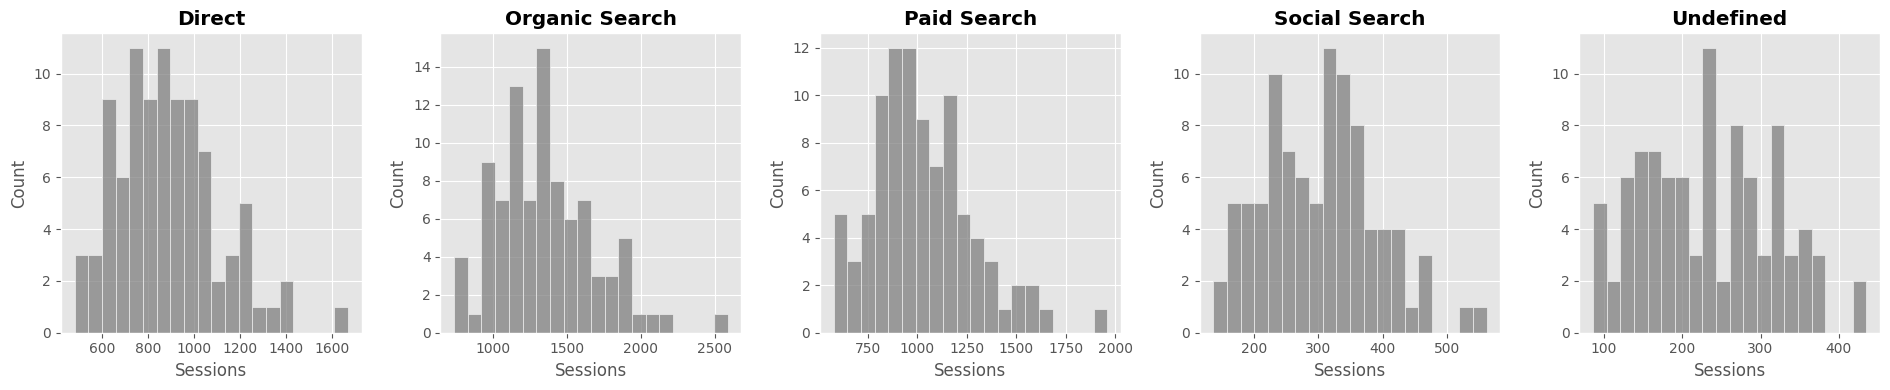

In [ ]:
# готуємо дані для візуалізації: фільтруємо, групуємо
direct = df[df["channel"] == "Direct"].groupby("date")["session_id"].count()
organic = df[df["channel"] == "Organic Search"].groupby("date")["session_id"].count()
paid = df[df["channel"] == "Paid Search"].groupby("date")["session_id"].count()
social = df[df["channel"] == "Social Search"].groupby("date")["session_id"].count()
undefined = df[df["channel"] == "Undefined"].groupby("date")["session_id"].count()

# будуємо візуалізацію розподілів кількості сесій за кожен день по кожному каналу
fig, axes = plt.subplots(1, 5, figsize=(19, 4))

# розподіл каналу direct
sns.histplot(x=direct.values, ax=axes[0], bins=20, color="gray")
axes[0].set_title("Direct", fontweight="bold")
axes[0].set_xlabel("Sessions")

# розподіл каналу organic
sns.histplot(x=organic.values, ax=axes[1], bins=20, color="gray")
axes[1].set_title("Organic Search", fontweight="bold")
axes[1].set_xlabel("Sessions")

# розподіл каналу paid
sns.histplot(x=paid.values, ax=axes[2], bins=20, color="gray")
axes[2].set_title("Paid Search", fontweight="bold")
axes[2].set_xlabel("Sessions")

# розподіл каналу social
sns.histplot(x=social.values, ax=axes[3], bins=20, color="gray")
axes[3].set_title("Social Search", fontweight="bold")
axes[3].set_xlabel("Sessions")

# розподіл каналу undefined
sns.histplot(x=undefined.values, ax=axes[4], bins=20, color="gray")
axes[4].set_title("Undefined", fontweight="bold")
axes[4].set_xlabel("Sessions")

plt.tight_layout()
plt.show()

Візуально деякі розподіли схожі на нормальні, деякі мають асиметрію. Перевіримо за допомогою тестів Д'Агостіно-Пірсона та Шапіро-Уілка.

In [ ]:
# проводимо тест Д'Агостіно-Пірсона
_, p_value_norm_direct = normaltest(direct)
_, p_value_norm_organic = normaltest(organic)
_, p_value_norm_paid = normaltest(paid)
_, p_value_norm_social = normaltest(social)
_, p_value_norm_undefined = normaltest(undefined)
print(f"p-value нормалтесту для direct: {p_value_norm_direct}")
print(f"p-value нормалтесту для organic: {p_value_norm_organic}")
print(f"p-value нормалтесту для paid: {p_value_norm_paid}")
print(f"p-value нормалтесту для social: {p_value_norm_social}")
print(f"p-value нормалтесту для undefined: {p_value_norm_undefined}")

# проводимо тест Шапіро-Уілка
_, p_value_shapiro_direct = shapiro(direct)
_, p_value_shapiro_organic = shapiro(organic)
_, p_value_shapiro_paid = shapiro(paid)
_, p_value_shapiro_social = shapiro(social)
_, p_value_shapiro_undefined = shapiro(undefined)
print(f"p-value тесту Шапіро-Уїлка для direct: {p_value_shapiro_direct}")
print(f"p-value тесту Шапіро-Уїлка для organic: {p_value_shapiro_organic}")
print(f"p-value тесту Шапіро-Уїлка для paid: {p_value_shapiro_paid}")
print(f"p-value тесту Шапіро-Уїлка для social: {p_value_shapiro_social}")
print(f"p-value тесту Шапіро-Уїлка для undefined: {p_value_shapiro_undefined}")

p-value нормалтесту для direct: 0.007853358264896217
p-value нормалтесту для organic: 0.0031046084804515037
p-value нормалтесту для paid: 0.0016504167955096551
p-value нормалтесту для social: 0.21439918696878835
p-value нормалтесту для undefined: 0.0402046864129123
p-value тесту Шапіро-Уїлка для direct: 0.034278771626201326
p-value тесту Шапіро-Уїлка для organic: 0.012271774671209374
p-value тесту Шапіро-Уїлка для paid: 0.010833125972481636
p-value тесту Шапіро-Уїлка для social: 0.14127184979117535
p-value тесту Шапіро-Уїлка для undefined: 0.054564615910193105


Результати тестів показали, що більшість розподілів не є нормальними (p-value > 0.05). Отже, для статистично аналізу застосуємо непараметричний тест Крускала-Уолліса.

In [ ]:
from scipy.stats import kruskal

_, p_value = kruskal(direct, organic, paid, social, undefined)
print(f"P-value: {p_value}")

print(f"\nМедіана кількості сесій каналу organic: {organic.median()}")
print(f"Медіана кількості сесій каналу paid: {paid.median()}")
print(f"Медіана кількості сесій каналу direct: {direct.median()}")
print(f"Медіана кількості сесій каналу social: {social.median()}")
print(f"Медіана кількості сесій каналу undefined: {undefined.median()}")

P-value: 1.397036102599359e-78

Медіана кількості сесій каналу organic: 1329.0
Медіана кількості сесій каналу paid: 989.0
Медіана кількості сесій каналу direct: 869.5
Медіана кількості сесій каналу social: 308.0
Медіана кількості сесій каналу undefined: 229.0


Результати тесту Крускала-Уолліса вказують на статистичну значущість даних (p-value < 0.05).

Органічний пошук генерував найбільшу кількість сесій на день (медіана - 1329).

3. Порівняємо долю сесій з органічним трафіком у Європі та Америці.

In [ ]:
import statsmodels.api as sm

organic_americas = df[(df["channel"] == "Organic Search") & (df["continent"] == "Americas")]["session_id"].count() # кількість органічних сесій в Америці
organic_europe = df[(df["channel"] == "Organic Search") & (df["continent"] == "Europe")]["session_id"].count() # кількість органічних сесій в Європі
total_americas = df[df["continent"] == "Americas"]["session_id"].count() # загальна кількість сесій в Америці
total_europe = df[df["continent"] == "Europe"]["session_id"].count() # загальна кількість сесій в Європі

# проводимо тест пропорцій (z-тест)
_, p_value = sm.stats.proportions_ztest([organic_americas, organic_europe], [total_americas, total_europe])
print(p_value)

0.7721879690501752


Тест пропорцій показав відсутність статистично значущої різниці між кількістю органічних сесій в Америці та Європі (p-value > 0.05).

4. Проведемо порівняння щоденних продажів у США з десктопів та мобільних.

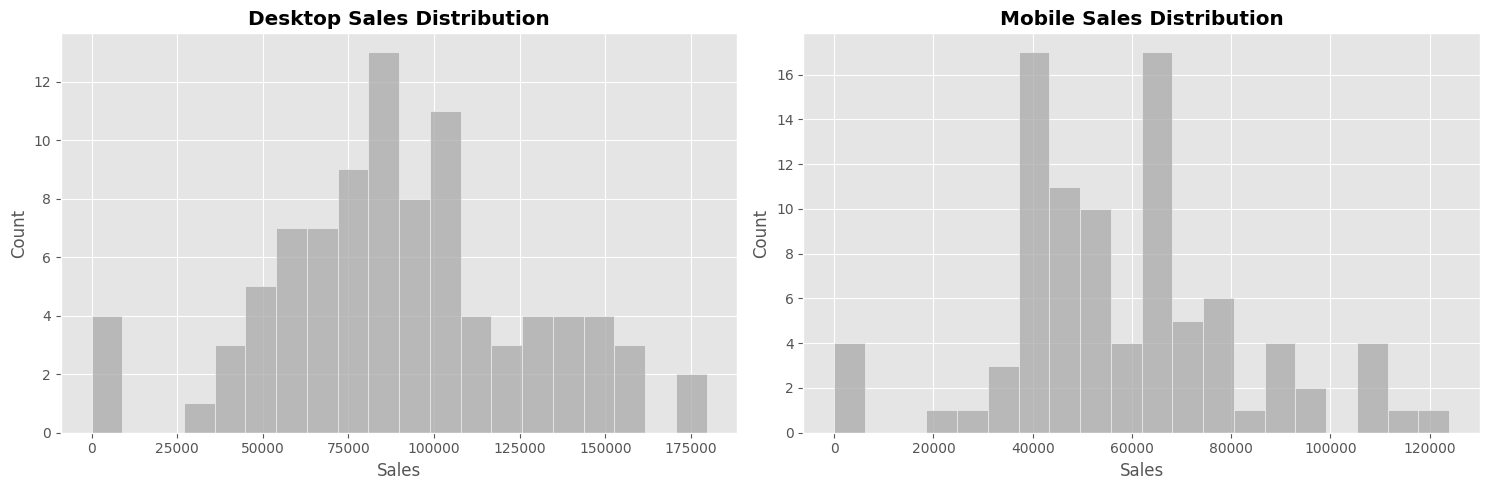

In [ ]:
# готуємо дані
us_desktop = df[(df["country"] == "United States") & (df["device"] == "desktop")].groupby("date")["price"].sum()
us_mobile = df[(df["country"] == "United States") & (df["device"] == "mobile")].groupby("date")["price"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# гістограма для середніх продажів із дескотів у США
sns.histplot(x=us_desktop.values, ax=axes[0], bins=20, color="darkgrey")
axes[0].set_title("Desktop Sales Distribution", fontweight="bold")
axes[0].set_xlabel("Sales")

# гістограма для середніх продажів із мобільних у США
sns.histplot(x=us_mobile.values, ax=axes[1], bins=20, color="darkgrey")
axes[1].set_title("Mobile Sales Distribution", fontweight="bold")
axes[1].set_xlabel("Sales")

plt.tight_layout()
plt.show()

In [ ]:
# проводимо тест Д'Агостіно-Пірсона
_, p_value_norm_desktop = normaltest(us_desktop)
_, p_value_norm_mobile = normaltest(us_mobile)
print(f"p-value нормалтесту для desktop: {p_value_norm_reg}")
print(f"p-value нормалтесту для mobile: {p_value_norm_unreg}")

# проводимо тест Шапіро-Уілка
_, p_value_shapiro_desktop = shapiro(us_desktop)
_, p_value_shapiro_mobile = shapiro(us_mobile)
print(f"p-value тесту Шапіро-Уїлка для desktop: {p_value_shapiro_reg}")
print(f"p-value тесту Шапіро-Уїлка для mobile: {p_value_shapiro_unreg}")

p-value нормалтесту для desktop: 0.010929121653065912
p-value нормалтесту для mobile: 0.026362411185738954
p-value тесту Шапіро-Уїлка для desktop: 0.007295139880540744
p-value тесту Шапіро-Уїлка для mobile: 0.0012184604855253293


Візуально ці розподіли нагадують нормальні, планувалося провести t-test. Але тести Д'Агостіно-Пірсона та Шапіро-Уілка відкидають гіпотезу про нормальність цих розподілів.

Скористаймося тестом знаків Вілкоксона для проведення статистичного порівняння.

In [ ]:
from scipy.stats import wilcoxon

# проводимо тест знаків Вілкоксона
_, p_value = wilcoxon(us_desktop, us_mobile)

print(p_value)

print(f"\nМедіана для desktop: {us_desktop.median()}")
print(f"Медіана для mobile: {us_mobile.median()}")

1.6678518253633023e-13

Медіана для desktop: 87947.25
Медіана для mobile: 54578.7


p-value < 0.05, а значить відмінність між групами статистично значуща.

Щоденні продажі з десктопів у США (медіана - 87947.25) значно перевищують продажі з мобільних (медіана - 54578.7).

In [ ]:
# вивантажуємо дані для імпорту в Tableau
df.to_csv("/content/1.csv", index=False, encoding="utf-8")

### [Посилання](https://public.tableau.com/app/profile/ihor.viskrivets/viz/PortfolioProject1_17597584432200/Portfolio1#1) на дашборд у Tableau